In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [14]:
# img_test = cv.imread('datasets/normal/nodefect(1).bmp')
img_test = cv.imread('datasets/unnormal/defection(3).bmp')
# plt.imshow(img_test)

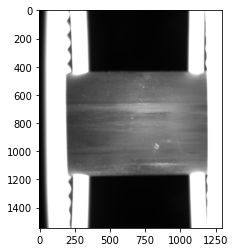

In [15]:
img_test_gray = cv.imread('datasets/unnormal/defection(1).bmp', cv.IMREAD_GRAYSCALE)
# img_test_gray = cv.imread('datasets/normal/nodefect(1).bmp', cv.IMREAD_GRAYSCALE)
plt.imshow(img_test_gray, cmap='gray')

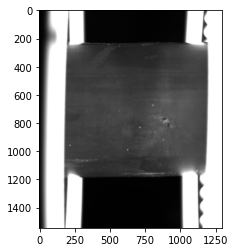

In [16]:
src_height, src_weight = img_test.shape[:2]

blured = cv.blur(img_test,(5,5))    #进行滤波去掉噪声
# cv.imshow("Blur", blured)     #显示低通滤波后的图像
plt.imshow(blured, cmap='gray')


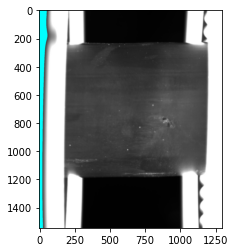

In [17]:
mask = np.zeros((src_height+2, src_weight+2), np.uint8)  #掩码长和宽都比输入图像多两个像素点，满水填充不会超出掩码的非零边缘
#进行泛洪填充
cv.floodFill(blured, mask, (30, 30), (0, 255, 255), (100, 100, 100), (50, 50, 50), cv.FLOODFILL_FIXED_RANGE)
# cv.floodFill(blured, mask, (src_height, src_weight), (255,255,255), (2,2,2),(3,3,3),8)
# cv.imshow("floodfill", blured)
plt.imshow(blured, cmap='gray')

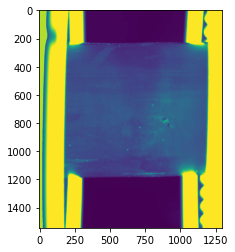

In [18]:
#得到灰度图
gray = cv.cvtColor(blured, cv.COLOR_BGR2GRAY)
# cv.imshow("gray", gray)
plt.imshow(gray)

In [19]:
#定义结构元素
kernel = cv2.getStructuringElement(cv.MORPH_RECT,(50, 50))
#开闭运算，先开运算去除背景噪声，再继续闭运算填充目标内的孔洞
opened = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
closed = cv.morphologyEx(opened, cv.MORPH_CLOSE, kernel)
# cv.imshow("closed", closed)
plt.imshow(closed, cmap='gray')

NameError: name 'cv2' is not defined

In [ ]:
#求二值图
ret, binary = cv.threshold(closed, 250, 255, cv.THRESH_BINARY)
# cv.imshow("binary", binary)
plt.imshow(binary)

In [ ]:
#找到轮廓
_, contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#绘制轮廓

img_test_gray_copy = img_test_gray.copy()
cv.drawContours(img_test_gray_copy,contours, -1, (0, 0, 255), 3)
plt.imshow(img_test_gray_copy)

#绘制结果
# cv.imshow("result", img)

# cv.waitKey(0)
# cv.destroyAllWindows()
